In [1]:
# Import PyTorch libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F

# Other libraries we'll use
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.11.0+cpu


In [2]:
data_path = '/kaggle/input/image-matching-challenge-2022/train'

In [3]:
src = '/kaggle/input/image-matching-challenge-2022/train/brandenburg_gate/images'

In [4]:
# Get the class names
classes = os.listdir(src)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(8, 12))
i = 0
for sub_dir in os.listdir(src):
    i+=1
    img_file = os.listdir(os.path.join(src))[0]
    img_path = os.path.join(src, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()

350 classes:
['00883281_9633489441.jpg', '01069771_8567470929.jpg', '02035158_8518636650.jpg', '02749394_3866382383.jpg', '02936509_94852264.jpg', '03058406_6979024134.jpg', '03300929_2790010816.jpg', '03774918_7196896770.jpg', '03890690_2728701915.jpg', '04683648_2472127584.jpg', '04684290_2698969364.jpg', '04692004_3962170930.jpg', '04705241_3760208106.jpg', '04803880_11119539065.jpg', '05712502_4051278060.jpg', '05714706_2362913557.jpg', '05767185_3704890278.jpg', '06809631_5499605152.jpg', '06863689_7353555136.jpg', '06935805_2163586273.jpg', '06950806_3245016486.jpg', '07361860_4676095706.jpg', '07663252_8186807321.jpg', '08158971_2821952368.jpg', '08455944_11844596793.jpg', '08468928_1469537330.jpg', '08507139_7168341023.jpg', '08655339_301940774.jpg', '08814095_3507579332.jpg', '09237518_3859534957.jpg', '09840944_156579676.jpg', '09870003_7184351941.jpg', '10502455_6696542067.jpg', '10605892_4176363979.jpg', '10624116_2746543073.jpg', '10670813_227462525.jpg', '11025595_6187208

In [5]:
#Initializing normalizing transform for the dataset
normalize_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean = (0.5, 0.5, 0.5), 
                                     std = (0.5, 0.5, 0.5))])

#Downloading the CIFAR10 dataset into train and test sets
train_dataset = torchvision.datasets.CIFAR10(
    root="src", train=True,
    transform=normalize_transform,
    download=True)
    
test_dataset = torchvision.datasets.CIFAR10(
    root="src", train=False,
    transform=normalize_transform,
    download=True)

batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting src/cifar-10-python.tar.gz to src
Files already downloaded and verified


(-0.5, 165.5, 165.5, -0.5)

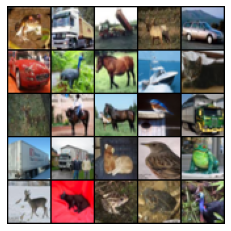

In [6]:
#Plotting 25 images from the 1st batch 
dataiter = iter(train_loader)
images, labels = dataiter.next()
plt.imshow(np.transpose(torchvision.utils.make_grid(
  images[:25], normalize=True, padding=1, nrow=5).numpy(), (1, 2, 0)))
plt.axis('off')

Text(0, 0.5, 'Number of training instances')

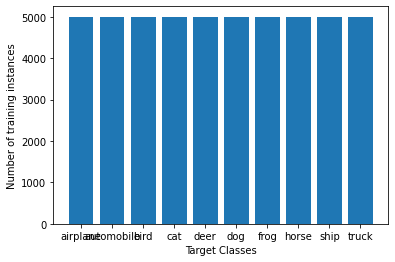

In [7]:

#Iterating over the training dataset and storing the target class for each sample
classes = []
for batch_idx, data in enumerate(train_loader, 0):
    x, y = data 
    classes.extend(y.tolist())
      
#Calculating the unique classes and the respective counts and plotting them
unique, counts = np.unique(classes, return_counts=True)
names = list(test_dataset.class_to_idx.keys())
plt.bar(names, counts)
plt.xlabel("Target Classes")
plt.ylabel("Number of training instances")

In [8]:

class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            #Input = 3 x 32 x 32, Output = 32 x 32 x 32
            torch.nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1), 
            torch.nn.ReLU(),
            #Input = 32 x 32 x 32, Output = 32 x 16 x 16
            torch.nn.MaxPool2d(kernel_size=2),
  
            #Input = 32 x 16 x 16, Output = 64 x 16 x 16
            torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1),
            torch.nn.ReLU(),
            #Input = 64 x 16 x 16, Output = 64 x 8 x 8
            torch.nn.MaxPool2d(kernel_size=2),
              
            #Input = 64 x 8 x 8, Output = 64 x 8 x 8
            torch.nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1),
            torch.nn.ReLU(),
            #Input = 64 x 8 x 8, Output = 64 x 4 x 4
            torch.nn.MaxPool2d(kernel_size=2),
  
            torch.nn.Flatten(),
            torch.nn.Linear(64*4*4, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 10)
        )
  
    def forward(self, x):
        return self.model(x)

Epoch 1/50: Training loss = 1.6513596480459813
Epoch 2/50: Training loss = 1.373803771365329
Epoch 3/50: Training loss = 1.2528613802722044
Epoch 4/50: Training loss = 1.1678512796111729
Epoch 5/50: Training loss = 1.1002460771509448
Epoch 6/50: Training loss = 1.0483868655646245
Epoch 7/50: Training loss = 1.0098637778435826
Epoch 8/50: Training loss = 0.9785531160166806
Epoch 9/50: Training loss = 0.953763754014164
Epoch 10/50: Training loss = 0.9332317962975758
Epoch 11/50: Training loss = 0.9174916120746252
Epoch 12/50: Training loss = 0.9045399157592403
Epoch 13/50: Training loss = 0.8936980119751542
Epoch 14/50: Training loss = 0.8847687823693161
Epoch 15/50: Training loss = 0.8768883935935662
Epoch 16/50: Training loss = 0.8698758772571983
Epoch 17/50: Training loss = 0.8615978843415789
Epoch 18/50: Training loss = 0.855819307477273
Epoch 19/50: Training loss = 0.8494980819999715
Epoch 20/50: Training loss = 0.8451304376277777
Epoch 21/50: Training loss = 0.8399321153340742
Epoc

Text(0, 0.5, 'Training loss')

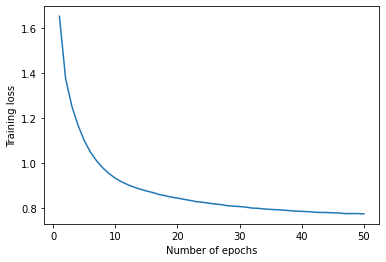

In [9]:
#Selecting the appropriate training device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN().to(device)
  
#Defining the model hyper parameters
num_epochs = 50
learning_rate = 0.001
weight_decay = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  
#Training process begins
train_loss_list = []
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}:', end = ' ')
    train_loss = 0
      
    #Iterating over the training dataset in batches
    model.train()
    for i, (images, labels) in enumerate(train_loader):
          
        #Extracting images and target labels for the batch being iterated
        images = images.to(device)
        labels = labels.to(device)
  
        #Calculating the model output and the cross entropy loss
        outputs = model(images)
        loss = criterion(outputs, labels)
  
        #Updating weights according to calculated loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
      
    #Printing loss for each epoch
    train_loss_list.append(train_loss/len(train_loader))
    print(f"Training loss = {train_loss_list[-1]}")   
      
#Plotting loss for all epochs
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

In [10]:

test_acc=0
model.eval()
  
with torch.no_grad():
    #Iterating over the training dataset in batches
    for i, (images, labels) in enumerate(test_loader):
          
        images = images.to(device)
        y_true = labels.to(device)
          
        #Calculating outputs for the batch being iterated
        outputs = model(images)
          
        #Calculated prediction labels from models
        _, y_pred = torch.max(outputs.data, 1)
          
        #Comparing predicted and true labels
        test_acc += (y_pred == y_true).sum().item()
      
    print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")

Test set accuracy = 71.86 %


(-0.5, 264.5, 66.5, -0.5)

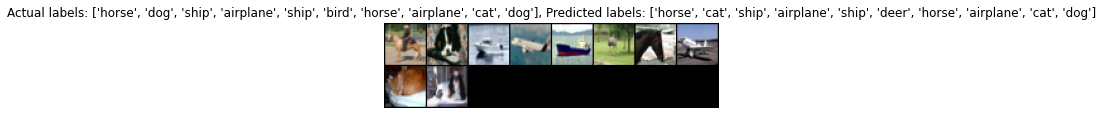

In [11]:

#Generating predictions for 'num_images' amount of images from the last batch of test set
num_images = 10
y_true_name = [names[y_true[idx]] for idx in range(num_images)] 
y_pred_name = [names[y_pred[idx]] for idx in range(num_images)] 
  
#Generating the title for the plot
title = f"Actual labels: {y_true_name}, Predicted labels: {y_pred_name}"
  
#Finally plotting the images with their actual and predicted labels in the title
plt.imshow(np.transpose(torchvision.utils.make_grid(images[:num_images].cpu(), normalize=True, padding=1).numpy(), (1, 2, 0)))
plt.title(title)
plt.axis("off")